## Introduction 

A/B testing helps us to test whether our idea is going to work or not. Typically, there is a lot of guesswork involved when coming up with new marketing ideas, and often there is a lack of tools, resources, or even motivation to test whether any of your marketing ideas will work.

However, this way of putting your marketing strategy ideas into work is risky and can be very costly. What if you spent lots of money on your new marketing campaign and it did not help you reach your marketing goal at all? What if you spent hundreds of hours refining your marketing message and it never attracted your prospects to engage with your marketing message?

## A/B Testing 

A/B testing is essentially a method of comparing and testing the effectiveness and benefits of two different business strategies. It can be considered as an experiment where two or more variants are tested for a set period of time and then the experiment results are evaluated to find the strategy that works best.

Consider a case where your goal is to improve marketing email open rates. If your hypothesis is that email subject line B will result in higher open rates than email subject line A, then you would run an A/B test with these two subject lines. You will randomly select half of the users and send out marketing emails with subject line A. The other half of randomly selected users will receive emails with subject line B. You will run this test for a predetermined period of time (which could be one week, two weeks, or one month, for instance) or until a predetermined number of users receive the two versions of emails (which is a minimum of 1,000 users to receive each version of the subject line). Once your tests are complete, then you analyze and evaluate the experiment results. When analyzing the results, you will need to check whether there is a statistically significant difference between the results of the two versions.

## Statistical hypothesis testing  

Student's t-test, or simply the t-test, is frequently used to test whether the difference between two tests is statistically significant. The t-test compares the two averages and examines whether they are significantly different from each other.

There are two important statistics in a t-test—the t-value and p-value. The t-value measures the degree of difference relative to the variation in the data. The larger the t-value is, the more difference there is between the two groups. On the other hand, the p-value measures the probability that the results would occur by chance.

The smaller the p-value is, the more statistically significant difference ther will be between the two groups.

### Null and alternative hypotheses 

The null hypothesis is that the two groups show no statistically significant difference. 

On the other hand, the alternate hypothesis states that the two groups show a statistically significant difference. When the t-value is larger than a threshold and the p-value is smaller than a threshold, we say that we can reject the null hypothesis and that the two groups show a statistically significant difference. Typically, 0.01 or 0.05 are used as the p-value thresholds for testing statistical significance. If the p-value is less than 0.05, then it suggests that there is less than 5% probability that the difference between the two groups occurs by chance. In other words, the difference is highly unlikely to be by chance.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
df = pd.read_csv("./ab_test.csv")
df.head(20)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


There are a total of seven variables in the dataset.

1. MarketID: unique identifier for market
2. MarketSize: size of market area by sales
3. LocationID: unique identifier for store location
4. AgeOfStore: age of store in years
5. Promotion: one of three promotions that was tested
6. week: one of four weeks when the promotions were run
7. SalesInThousands: sales amount for specific LocationID, Promotion, and week

In [17]:
df.shape

(548, 7)

### Exploratory Data Analysis 

Let us look at the total sales distribution across different promotions. As you can see from the code below, we are grouping the data by the Promotion column and aggregating the total sales amount by summing over the SalesInThousands column.

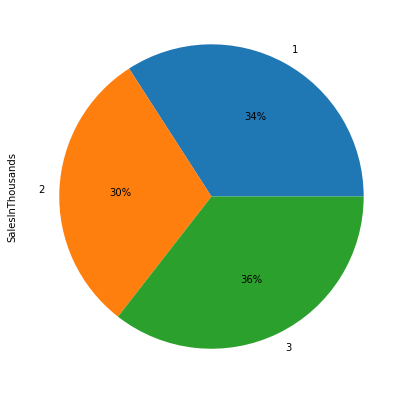

In [19]:
ax = df.groupby(
    'Promotion')
.sum()['SalesInThousands']
.plot.pie(figsize=(7,7), 
          autopct='%1.0f%%')

As seen from the pie chart, promotion group 3 has the largest aggregate sales among the three groups. However, each promotion group takes roughly about one third of the total sales during the promotion weeks.  

Similarly, we can also visualize the compositions of different market sizes in each promotional group

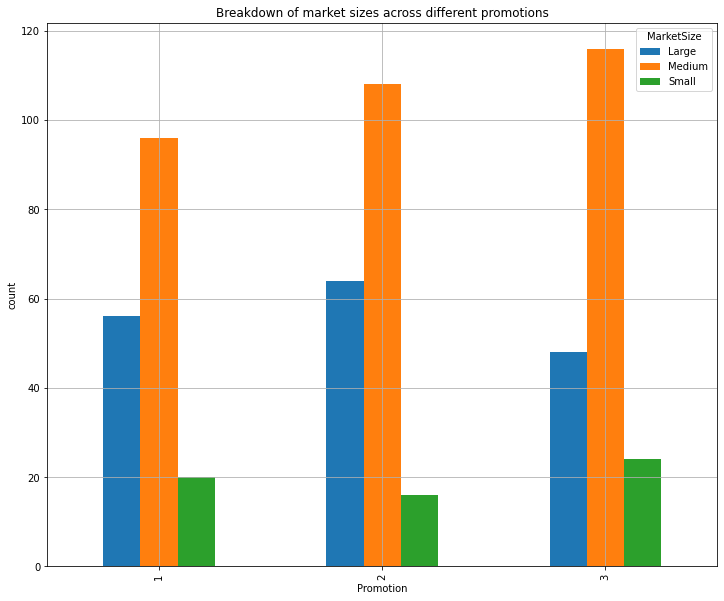

In [20]:
ax = df.groupby([
    "Promotion", "MarketSize"
]).count()[
    'MarketID'
].unstack(
'MarketSize').plot(
kind='bar',
figsize=(12,10),
grid=True,
)

ax.set_ylabel('count')
ax.set_title('Breakdown of market sizes across different promotions')

plt.show()

We can make it much easier to view by displaying the data in a stacked bar plot

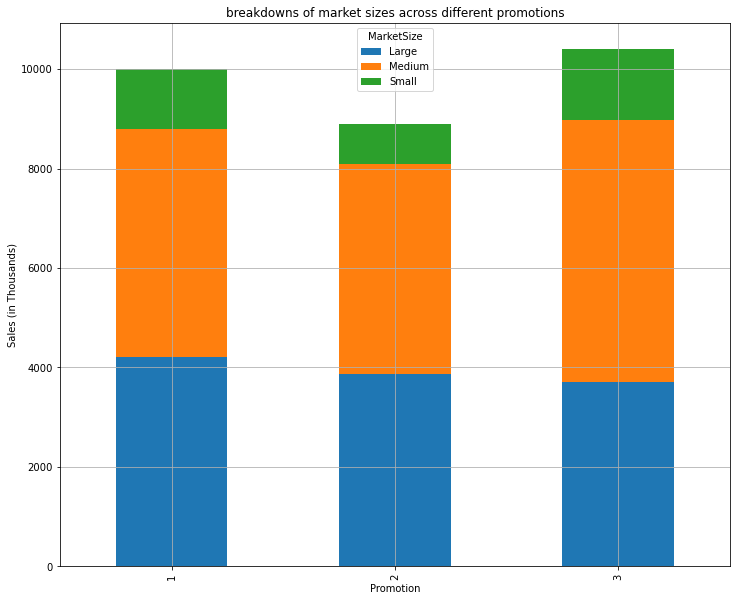

In [21]:
ax = df.groupby([
    'Promotion', 'MarketSize'
]).sum()[
    'SalesInThousands'
].unstack(
'MarketSize'
).plot(
kind='bar',
figsize=(12,10),
grid=True,
stacked=True
)

ax.set_ylabel('Sales (in Thousands)')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

As we can see, the medium market size occupies the most among all three promotion groups, while the small market size occupies the least.

Let's look at AgeofStore and its overall distribution across all different promotional groups

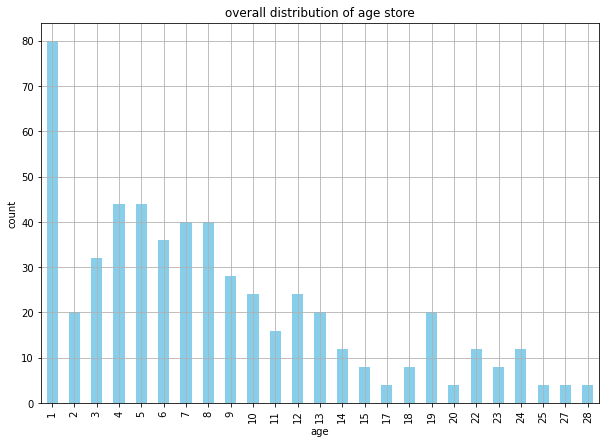

In [22]:
ax = df.groupby(
'AgeOfStore'
).count()[
    'MarketID'
].plot(
kind='bar',
color='skyblue',
figsize=(10,7),
grid=True
)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('overall distribution of age store')

plt.show()

As we can see, a large number of stores are 1 year old and the majority of stores are 10 years old or less. Howeverm what we are more interested in is whether the stores in the three different promotion groups have similar store age profiles.

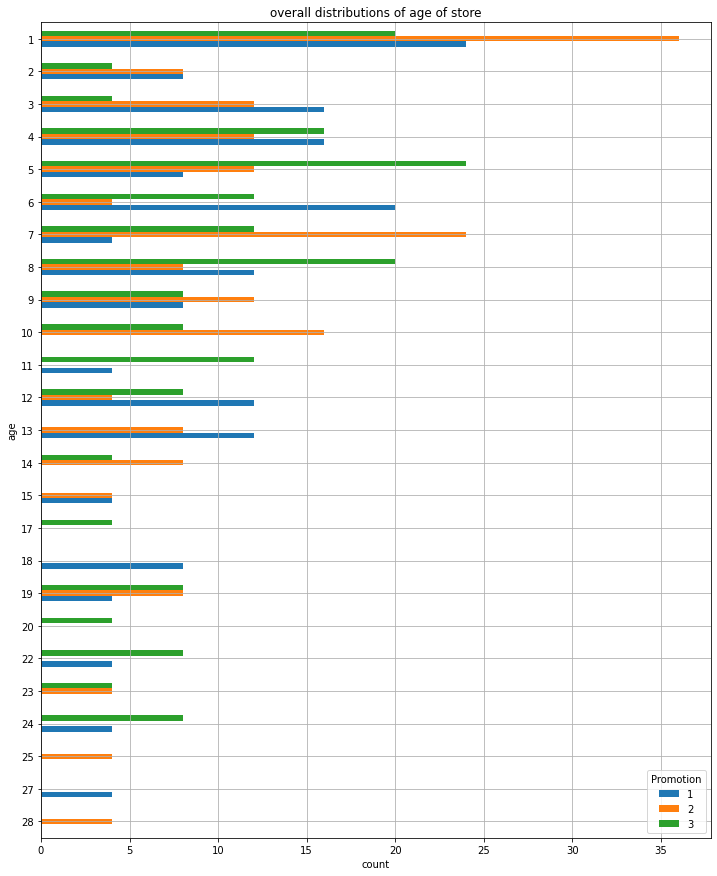

In [23]:
ax = df.groupby(
    ['AgeOfStore', 'Promotion']
).count()[
    'MarketID'
].unstack(
'Promotion').iloc[::-1].plot(
kind='barh',
figsize=(12,15),
grid=True)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

The store age distributions across the three different promotion groups seem to align with each other, but it is quite difficult to digest the information presented from this plot. It will be easier to look at the summary statistics of store ages across the three promotion groups.

In [24]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


We can see that all three test groups seem to have similar store age profiles. The average age of stores for the three groups are 8-9 years old and the majority of stores are 10-12 years old or younger.

By analyzing how each promotion or test group is comprised, we could verify that the store profiles are similar to each other. This suggests that the sample groups are well controlled and the A/B testing results will be meaningful and trustworthy.

### Statistical hypothesis testing 

The ultimate goal of A/B testing of different marketing strategies is to find out which strategy is the most efficient and works the best among the others.

We can compute the t-value and p-value from the equation

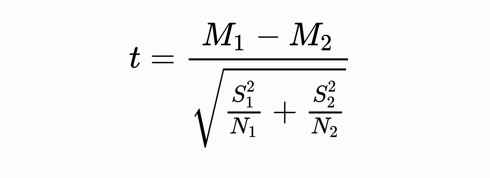

We can easily compute the mean, standard deviation, and number of samples in each test group by using the mean,
std, and count functions respectively.

In [28]:
means = df.groupby('Promotion').mean()['SalesInThousands']
means

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

In [29]:
stds = df.groupby('Promotion').std()['SalesInThousands']
stds

Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64

In [30]:
ns = df.groupby('Promotion').count()['SalesInThousands']
ns

Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64

#### Promotion 1 vs Promotion 2

In [32]:
import numpy as np

t_1_vs_2 = (
            means.iloc[0] - means.iloc[1]
        )/ np.sqrt(
            (stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[1]**2/ns.iloc[1])
        )

In [33]:
t_1_vs_2

6.427528670907475

We can compute the t-value for comparing the performances of promotion 1 and promotion 2. The t-value we get from running the code is 6.4275.

In [36]:
from scipy import stats

df_1_vs_1 = ns.iloc[0] + ns.iloc[1] - 2

p_1_vs_2 = (1 - stats.t.cdf(t_1_vs_2, df=df_1_vs_1))*2

We first compute the degrees of freedom, which is the sum of the number of samples in both groups minus two. With the t-value calculated previously, we can compute the p-value, using the t.cdf function from scipy package's stats module. 

In [37]:
p_1_vs_2

4.143296816749853e-10

The p-value we get from running this code is 4.143e-10. This is an extremely small number that is close to 0. As discussed earlier, a p-value closer to 0 suggests that there is a strong evidence against the null hypothesis and that the difference between the two test groups is significant. 

The average sales (in thousands) for promotion group 1 is about 58.1, and for promotion group 2 it's about 47.33. From our t-test, we have shown that the marketing performances for these two groups are significantly different and that promotion group 1 outperforms promotion group 2. However, if we run a t-test between the promotion group 1 and promotion group 3, we see different results.

#### Promotion 1 vs 3

In [38]:
t_1_vs_3 = (
    means.iloc[0] - means.iloc[2]
)/ np.sqrt(
    (stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[2]**2/ns.iloc[2])
)

df_1_vs_3 = ns.iloc[0] + ns.iloc[1] - 2

p_1_vs_3 = (1 - stats.t.cdf(t_1_vs_3, df=df_1_vs_3))*2

In [39]:
t_1_vs_3

1.556022430775863

In [40]:
p_1_vs_3

0.12058631176434842

Using Scipy to calculate t-value and p-value

In [41]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
    equal_var=False
)

In [42]:
t

6.42752867090748

In [43]:
p

4.2903687179871785e-10

In [44]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False
)

In [45]:
t

1.5560224307758634

In [46]:
p

0.12059147742229478

On the surface, the average sales from promotion group 1 (58.1) looks higher than those from promotion group 2 (55.36). However, when we run a t-test between these two groups, we get a t-value of 1.556 and a p-value of 0.121. The computed p-value is much higher than 0.05, which is a generally accepted cut-off line. This suggests that the marketing performance from promotion group 1 is not statistically different from the marketing performance from promotion group 2. Thus, even though promotion group 1's average sales number is higher than the promotion group 2's from the A/B test, the difference is not statistically significant and we cannot conclude that promotion group 1 performs much better than promotion group 2. From these evaluation results, we can conclude that promotion groups 1 and 3 outperform promotion group 2, but the difference between promotion groups 1 and 3 is not statistically significant.